In [33]:
#!pip install -q vartests

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import vartests

In [35]:
data = pd.read_csv('study_data.csv', header=0, names=['Date', 'SPX', 'DAX', 'WIG20', 'EURUSD'], index_col='Date', parse_dates=['Date'])

In [36]:
columns = ['SPX', 'DAX', 'WIG20', 'EURUSD']

In [37]:
#predict implied volatility and VaR based on multivariate GARCH(1,1) model
freq_var_forecast = pd.read_csv('varf_h_forecast_new.csv', parse_dates=['Date'], index_col='Date')
freq_var_forecast

,SPX,DAX,WIG20,EURUSD
Date,,,,
2013-02-12,0.069612,0.047200,-0.017449,-0.032407
2013-02-13,0.052667,-0.031135,-0.139454,-0.016698
2013-02-14,0.099618,0.374485,0.312702,0.086777
2013-02-15,0.044985,0.094216,0.128097,0.081084
2013-02-20,0.048905,-0.429263,-0.428952,-0.001462
...,...,...,...,...
2022-03-14,0.668681,-0.367951,-0.675451,-0.141050
2022-03-15,-0.213164,0.562609,1.150617,0.096847
2022-03-16,0.103476,-0.026846,0.479727,0.084275


In [38]:
data_forecasting = data.iloc[249:2308]
data_forecasting['const'] = 1.0
data_forecasting

,SPX,DAX,WIG20,EURUSD,const
Date,,,,,
2013-02-11,-0.060627,-0.240745,0.098532,0.268998,1.0
2013-02-12,0.159397,0.345889,-1.102991,0.372412,1.0
2013-02-13,0.059215,0.672651,0.029545,-0.022306,1.0
2013-02-14,0.069040,-1.051950,-0.602733,-0.686467,1.0
2013-02-15,-0.104565,-0.494986,0.457760,0.007487,1.0
...,...,...,...,...,...
2022-03-11,-1.304629,1.374300,3.158294,-0.709641,1.0
2022-03-14,-0.744863,2.184632,-3.063428,0.223390,1.0
2022-03-15,2.118255,-0.085038,1.399293,0.274890,1.0


In [39]:
var_coeffs_ext = pd.read_csv('var_coeffs_ext_new.csv')
var_coeffs_ext.index = data_forecasting.index
var_coeffs_ext.head()

,SPX_SPXl1,SPX_DAXl1,SPX_WIG20l1,SPX_EURUSD_l1,SPX_const,DAX_SPXl1,DAX_DAXl1,DAX_WIG20l1,DAX_EURUSD_l1,DAX_const,WIG20_SPXl1,WIG20_DAXl1,WIG20_WIG20l1,WIG20_EURUSD_l1,WIG20_const,EURUSD_SPXl1,EURUSD_DAXl1,EURUSD_WIG20l1,EURUSD_EURUSD_l1,EURUSD_const
Date,,,,,,,,,,,,,,,,,,,,
2013-02-11,0.055485,-0.011246,-0.022735,-0.046989,0.057081,0.515904,-0.198229,-0.016866,-0.129335,0.063094,0.376408,-0.273208,0.015710,0.043110,0.018325,-0.010048,-0.069871,0.036803,0.018620,0.027021
2013-02-12,0.053941,-0.010762,-0.022369,-0.044583,0.056378,0.520882,-0.196638,-0.023802,-0.134444,0.067994,0.390122,-0.277751,0.012902,0.021529,0.024373,0.001102,-0.073714,0.034794,0.000947,0.031814
2013-02-13,0.045626,-0.012196,-0.017785,-0.028230,0.053541,0.502428,-0.205960,-0.009135,-0.089299,0.056331,0.387599,-0.280906,0.016284,0.030412,0.021136,0.003097,-0.077238,0.036526,0.002602,0.029115
2013-02-14,0.043454,-0.010574,-0.018112,-0.025947,0.052780,0.493045,-0.198079,-0.010979,-0.080113,0.053350,0.389053,-0.281408,0.016218,0.028435,0.021849,0.001579,-0.071712,0.034143,0.000804,0.030118
2013-02-15,0.041445,-0.003213,-0.024944,-0.025287,0.046761,0.491546,-0.195866,-0.012838,-0.077542,0.050519,0.381467,-0.273132,0.009697,0.043303,0.008999,-0.002249,-0.067270,0.030590,0.008139,0.023499


In [40]:
#predict implied volatility and VaR based on multivariate GARCH(1,1) model
f_var_forecast = pd.read_csv('varf_h_forecast_new.csv', parse_dates=['Date'], index_col='Date')

coeff_cols_SPX = ['SPX_SPXl1', 'SPX_DAXl1', 'SPX_WIG20l1', 'SPX_EURUSD_l1', 'SPX_const']
coeff_cols_DAX = ['DAX_SPXl1', 'DAX_DAXl1', 'DAX_WIG20l1', 'DAX_EURUSD_l1', 'DAX_const']
coeff_cols_WIG20 = ['WIG20_SPXl1', 'WIG20_DAXl1', 'WIG20_WIG20l1', 'WIG20_EURUSD_l1', 'WIG20_const'] 
coeff_cols_EURUSD = ['EURUSD_SPXl1', 'EURUSD_DAXl1', 'EURUSD_WIG20l1', 'EURUSD_EURUSD_l1', 'EURUSD_const']


SPX = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_SPX]), np.array(data_forecasting)))
DAX = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_DAX]), np.array(data_forecasting)))
WIG20 = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_WIG20]), np.array(data_forecasting)))
EURUSD = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_EURUSD]), np.array(data_forecasting)))

for i in range(len(f_var_forecast)):
    f_var_forecast['SPX'].iloc[i] = np.sum(SPX.iloc[i])
    f_var_forecast['DAX'].iloc[i] = np.sum(DAX.iloc[i])
    f_var_forecast['WIG20'].iloc[i] = np.sum(WIG20.iloc[i])
    f_var_forecast['EURUSD'].iloc[i] = np.sum(EURUSD.iloc[i])

f_var_forecast

,SPX,DAX,WIG20,EURUSD
Date,,,,
2013-02-12,0.041545,0.043086,0.074423,0.053087
2013-02-13,0.069323,0.059191,-0.015727,-0.031533
2013-02-14,0.048143,-0.050735,-0.145061,-0.021635
2013-02-15,0.095632,0.357372,0.315442,0.084534
2013-02-20,0.032410,0.089614,0.109071,0.071096
...,...,...,...,...
2022-03-14,-0.194269,-0.739073,-1.231208,-0.142619
2022-03-15,0.805665,-0.347884,-0.498264,-0.103406
2022-03-16,-0.134934,0.668193,1.218483,0.110861


In [41]:
#save to csv
f_var_forecast.to_csv('value_at_risk_frequentist.csv')

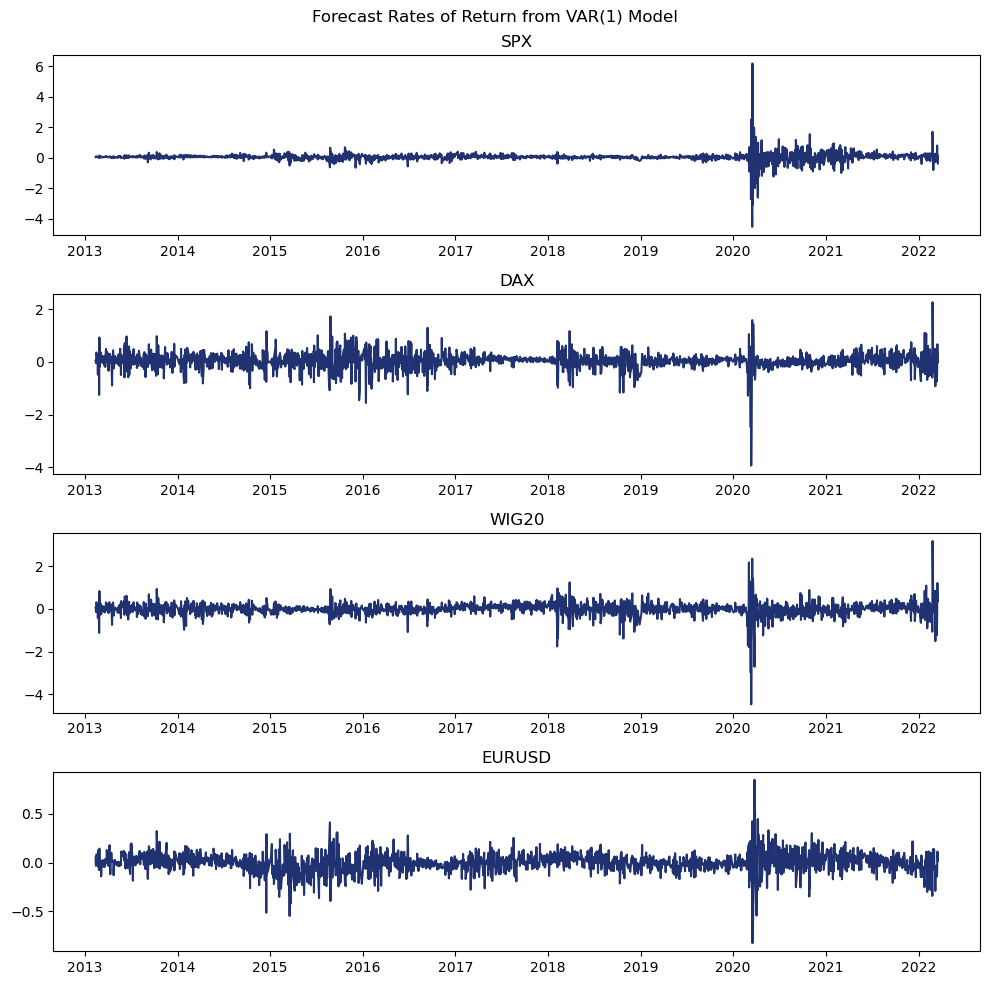

In [42]:
#plot forecast rates of return
fig, ax = plt.subplots(4, 1, dpi=100, figsize=(10,10))
plt.suptitle('Forecast Rates of Return from VAR(1) Model')

a=0
for i in columns:
    ax[a].plot(f_var_forecast[i], c='#203271')
    ax[a].set_title('%s' %i)
    a += 1
    
plt.tight_layout()
plt.show()
fig.savefig('returns forecast.pdf', bbox_inches='tight')

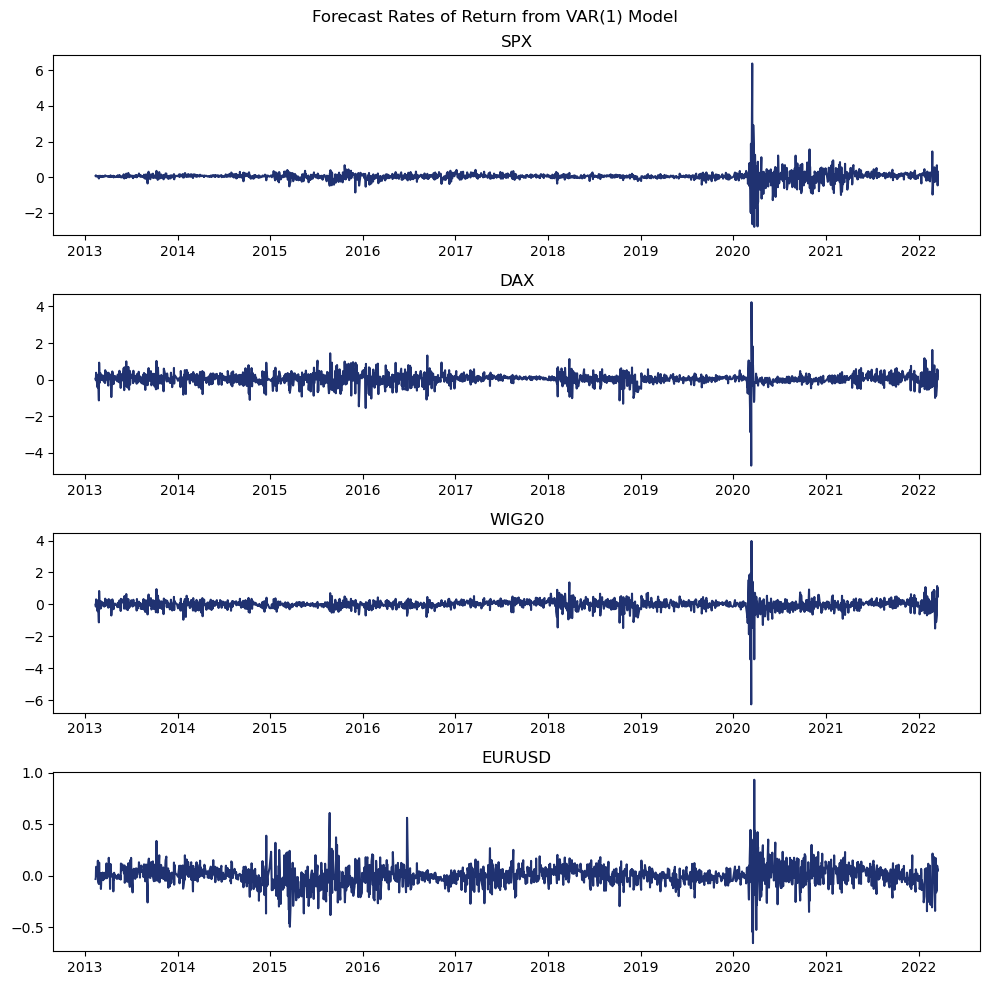

In [43]:
#plot forecast rates of return
fig, ax = plt.subplots(4, 1, dpi=100, figsize=(10,10))
plt.suptitle('Forecast Rates of Return from VAR(1) Model')

a=0
for i in columns:
    ax[a].plot(freq_var_forecast[i], c='#203271')
    ax[a].set_title('%s' %i)
    a += 1
    
plt.tight_layout()
plt.show()
#fig.savefig('returns forecast.png', bbox_inches='tight')

In [44]:
#porfolio weights vector omega_t (time-constant)
omega = np.array([.625, .235, .11, .03])

In [45]:
#H-matrices forecast
H_freq_forecast = pd.read_csv('dccf_H_forecast_new.csv')
H_freq_forecast

,H11,H12,H13,H14,H21,H22,H23,H24,H31,H32,H33,H34,H41,H42,H43,H44
0,0.525529,0.446832,0.286269,0.178461,0.446832,0.790903,0.466666,0.207794,0.286269,0.466666,0.713408,0.133358,0.178461,0.207794,0.133358,0.255909
1,0.543942,0.452579,0.246587,0.181773,0.452579,0.856152,0.427863,0.189601,0.246587,0.427863,0.481017,0.112666,0.181773,0.189601,0.112666,0.272574
2,0.785467,0.571342,0.466329,0.216554,0.571342,1.090109,0.632435,0.195252,0.466329,0.632435,1.071582,0.174457,0.216554,0.195252,0.174457,0.269041
3,0.541213,0.371073,0.296928,0.153748,0.371073,0.653935,0.360594,0.133521,0.296928,0.360594,0.620073,0.122550,0.153748,0.133521,0.122550,0.227301
4,1.125011,0.831065,0.675403,0.176268,0.831065,1.464270,0.885007,0.117074,0.675403,0.885007,1.585329,0.176006,0.176268,0.117074,0.176006,0.201139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.585422,0.422885,0.281746,0.075360,0.422885,1.224431,0.678706,0.064913,0.281746,0.678706,1.382662,0.058343,0.075360,0.064913,0.058343,0.097614
99,0.597331,0.198443,0.319822,0.104892,0.198443,0.339229,0.300011,0.016600,0.319822,0.300011,1.062774,0.051174,0.104892,0.016600,0.051174,0.134189
100,0.762045,0.387565,0.279088,0.085438,0.387565,0.842483,0.491787,0.009871,0.279088,0.491787,1.020653,0.027723,0.085438,0.009871,0.027723,0.120052
101,1.175156,0.506689,0.361066,0.073317,0.506689,1.090251,0.553029,0.008746,0.361066,0.553029,1.165032,0.042583,0.073317,0.008746,0.042583,0.117719


In [46]:
#VaR forecast
from scipy.stats import norm

z_alpha = norm().ppf(.95)
VaR = []
j = 0

for i in range(len(f_var_forecast)):
    if (((i%20)==0) & (i!=20)):
        j+=1
    H_freq_t = np.array(H_freq_forecast.iloc[j]).reshape((4,4)).T
    VaR_freq = (1-np.exp(omega@f_var_forecast.iloc[i]+z_alpha*np.sqrt(omega.T@H_freq_t@omega)))
    VaR.append(VaR_freq)

VaR = pd.DataFrame(VaR, columns=['VaR forecast'], index=f_var_forecast.index)
VaR

,VaR forecast
Date,
2013-02-12,-2.214092
2013-02-13,-2.242148
2013-02-14,-2.074788
2013-02-15,-2.679078
2013-02-20,-2.245019
...,...
2022-03-14,-2.580718
2022-03-15,-6.958586
2022-03-16,-5.823861


In [47]:
#VaR assessment
#calculate portfolio returns
data_short = data.iloc[-len(f_var_forecast):]
daily_return = []

for i in range(len(f_var_forecast)):
    portfolio_daily_return = data_short[columns].iloc[i]@omega.T
    daily_return.append(portfolio_daily_return)

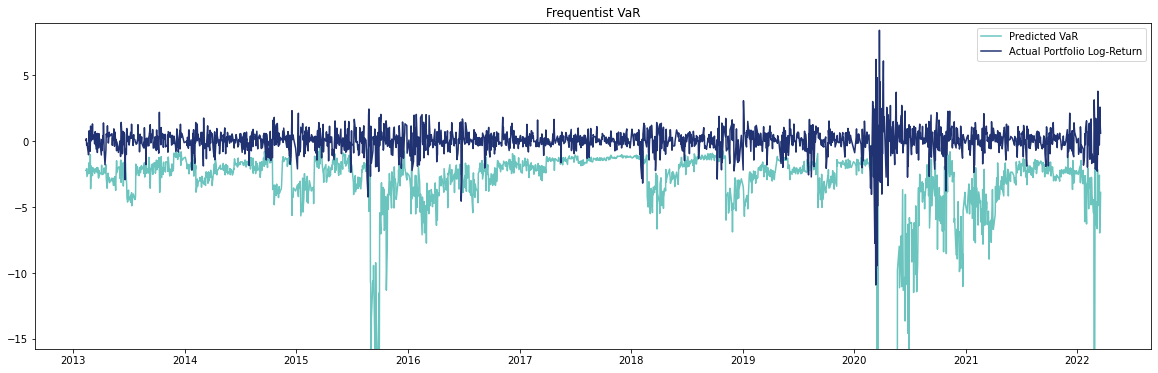

In [48]:
plt.figure(figsize=(20,6))
plt.plot(data_short.index, VaR['VaR forecast'], color='#6bc5be', label='Predicted VaR')
plt.plot(data_short.index, daily_return, c='#203271', label='Actual Portfolio Log-Return')
plt.ylim((-15.75, 9))
plt.title('Frequentist VaR')
plt.legend()
plt.savefig('frequentist VaR.pdf', bbox_inches='tight')
plt.show()

In [49]:
VaR['Actual'] = daily_return
VaR['Exceeded'] = np.where(VaR['VaR forecast']>VaR['Actual'], True, False)
VaR

,VaR forecast,Actual,Exceeded
Date,,,
2013-02-12,-2.214092,0.070751,False
2013-02-13,-2.242148,0.197663,False
2013-02-14,-2.074788,-0.290953,False
2013-02-15,-2.679078,-0.131097,False
2013-02-20,-2.245019,-1.025583,False
...,...,...,...
2022-03-14,-2.580718,-0.282426,False
2022-03-15,-6.958586,1.466094,False
2022-03-16,-5.823861,2.591730,False


In [50]:
print('VaR exceeded %10.4f' % float(sum(VaR['Exceeded'])*100/len(VaR)), '% of the time')

VaR exceeded     2.3312 % of the time


In [51]:
vartests.kupiec_test(VaR['Exceeded'], var_conf_level=0.95, conf_level=0.95)

{'statictic test': 38.1773454602386,
 'chi square value': 0.9999999993540193,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Reject H0'}

In [52]:
var_coeffs = pd.read_csv('var_coeffs_new.csv')
var_coeffs.head()

,SPX_SPXl1,SPX_DAXl1,SPX_WIG20l1,SPX_EURUSD_l1,SPX_const,DAX_SPXl1,DAX_DAXl1,DAX_WIG20l1,DAX_EURUSD_l1,DAX_const,WIG20_SPXl1,WIG20_DAXl1,WIG20_WIG20l1,WIG20_EURUSD_l1,WIG20_const,EURUSD_SPXl1,EURUSD_DAXl1,EURUSD_WIG20l1,EURUSD_EURUSD_l1,EURUSD_const
0,0.055485,-0.011246,-0.022735,-0.046989,0.057081,0.515904,-0.198229,-0.016866,-0.129335,0.063094,0.376408,-0.273208,0.015710,0.043110,0.018325,-0.010048,-0.069871,0.036803,0.018620,0.027021
1,0.053018,-0.035056,-0.015295,0.004841,0.045762,0.559749,-0.245348,-0.018180,-0.015327,0.041780,0.373656,-0.260832,-0.015887,0.052356,-0.011096,0.014410,-0.085100,0.026321,0.025867,0.003727
2,0.055684,-0.013830,-0.027537,-0.015306,0.033473,0.484046,-0.166501,-0.070613,-0.015303,0.012143,0.354710,-0.210949,-0.005606,-0.026326,-0.033328,-0.007656,-0.058209,0.014653,0.017357,0.006166
3,0.068265,-0.016238,-0.037410,-0.052902,0.047443,0.496657,-0.167172,-0.085204,-0.045840,0.058928,0.315340,-0.206018,-0.007350,0.003348,-0.008697,0.008631,-0.058084,0.012063,0.003446,0.010344
4,0.046555,-0.039045,-0.010649,0.008905,0.031406,0.532060,-0.132934,-0.055327,-0.005663,0.013347,0.389641,-0.224712,0.034334,0.042074,-0.040666,-0.012674,-0.045876,0.032715,0.014626,0.019817


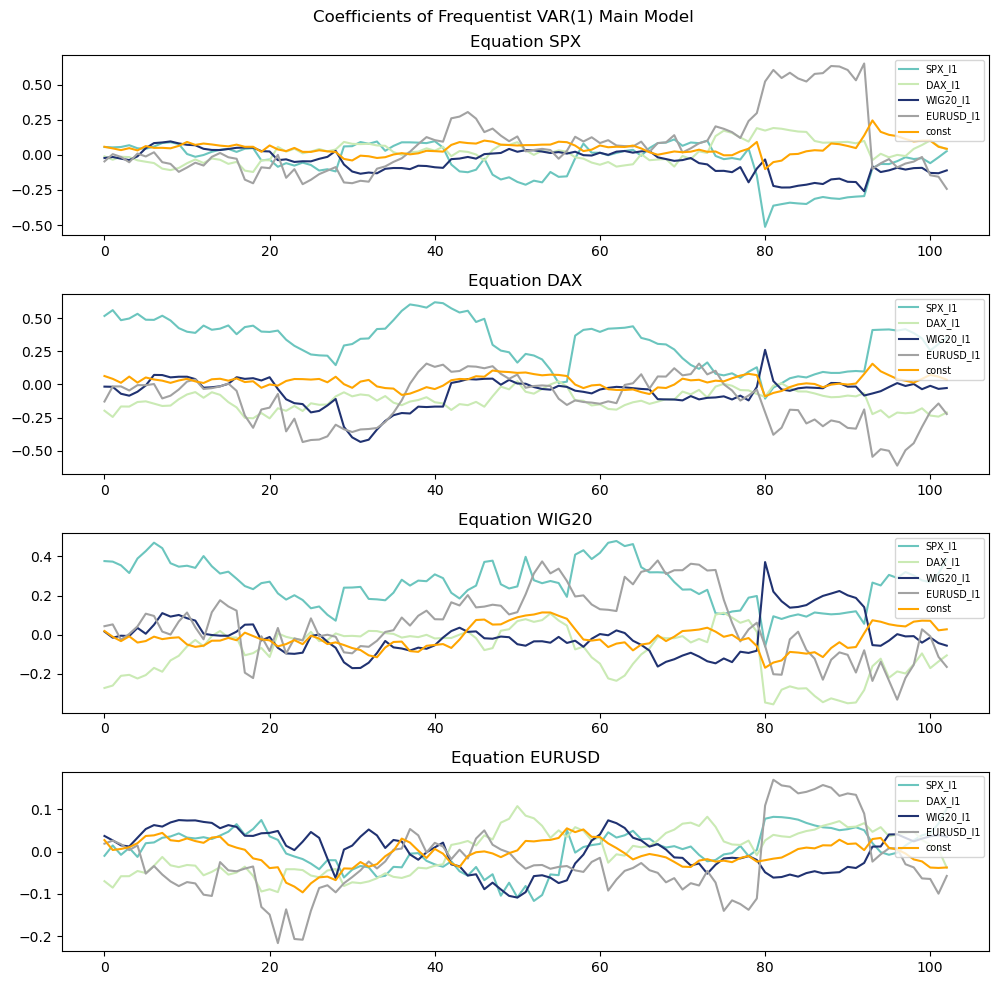

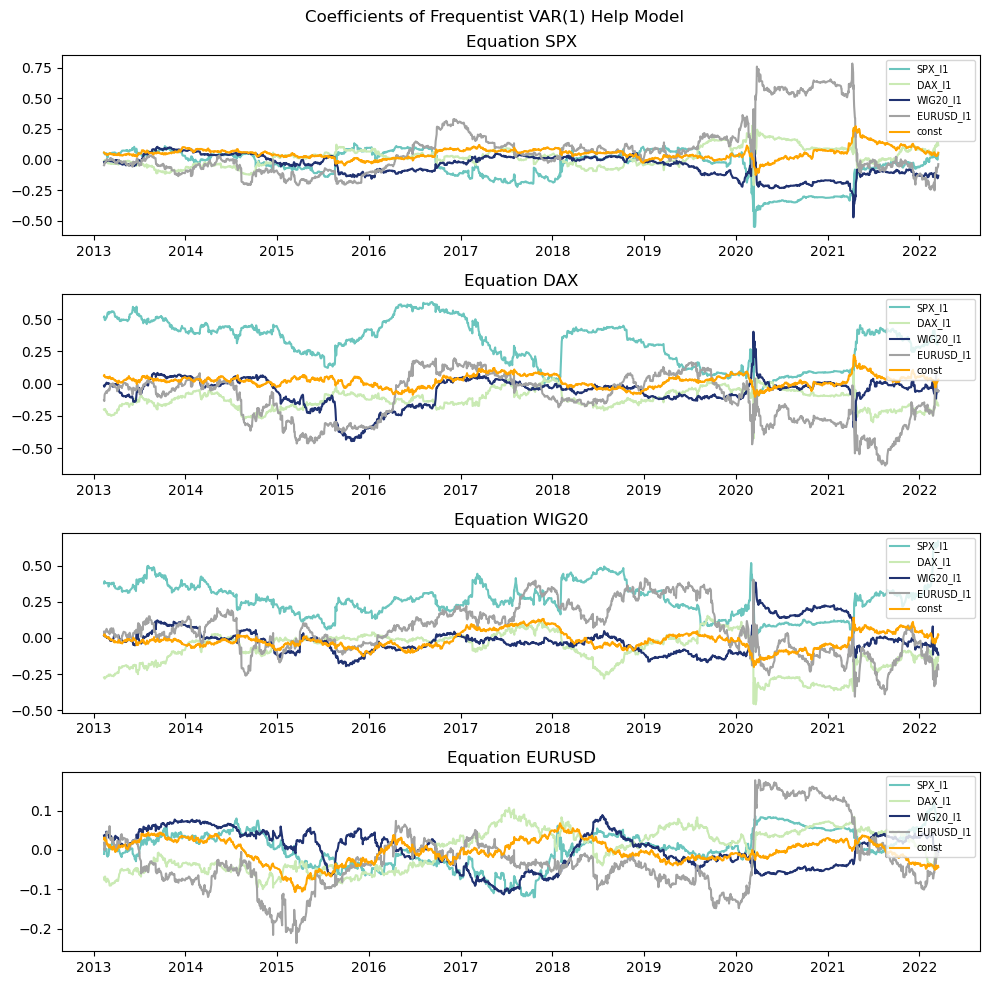

In [53]:
#plot VAR model coefficients
def plot_coefficients(df, flag):
    fig, ax = plt.subplots(4, 1, dpi=100, figsize=(10,10))
    if (flag=='main'):
        plt.suptitle('Coefficients of Frequentist VAR(1) Main Model')
    else:
        plt.suptitle('Coefficients of Frequentist VAR(1) Help Model')
    palette=['#6bc5be','#caeab4','#203271','#a2a2a2', 'orange']

    coeff_columns = ['SPX_SPXl1', 'SPX_DAXl1', 'SPX_WIG20l1', 'SPX_EURUSD_l1', 'SPX_const',
                    'DAX_SPXl1', 'DAX_DAXl1', 'DAX_WIG20l1', 'DAX_EURUSD_l1', 'DAX_const',
                    'WIG20_SPXl1', 'WIG20_DAXl1', 'WIG20_WIG20l1', 'WIG20_EURUSD_l1', 'WIG20_const',
                    'EURUSD_SPXl1', 'EURUSD_DAXl1', 'EURUSD_WIG20l1', 'EURUSD_EURUSD_l1', 'EURUSD_const']

    a=0
    b=0
    for i in coeff_columns:
        ax[a].plot(df[i], c=palette[b%5], label=i)
        if(b==4 or b==9 or b==14):
            a+=1
        b+=1

    coeff_names = ['SPX_l1', 'DAX_l1', 'WIG20_l1', 'EURUSD_l1', 'const']
    for j in range(4):
        ax[j].set_title('Equation %s'%columns[j])
        ax[j].legend(coeff_names, loc='upper right', fontsize='x-small')

    plt.tight_layout()
    plt.show()
    
    if (flag=='main'):
        fig.savefig('main coefficients frequentist.pdf', bbox_inches='tight')
    else:
        fig.savefig('help coefficients frequentist.pdf', bbox_inches='tight')
        
plot_coefficients(var_coeffs, 'main')
plot_coefficients(var_coeffs_ext, 'help')

In [54]:
vartests.duration_test(VaR['Exceeded'], conf_level=0.95)

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL


{'weibull exponential': array([0.56949059]),
 'unrestricted log-likelihood': array([-205.16630778]),
 'restricted log-likelihood': -220.01201539473132,
 'log-likelihood': array([29.69141523]),
 'log-likelihood ratio test statistic': array([5.06586679e-08]),
 'null hypothesis': 'Duration Between Exceedances have no memory (Weibull b=1 = Exponential)',
 'decision': 'Reject H0'}

In [55]:
import scipy.stats

#Christoffersen test
def christoffersen_test(series, q):
    u_00 = u_01 = u_10 = u_11 = 0
    #count the number of transitions
    for i in range(1,len(series)):
        if (series[i]==series[i-1]):
            if(series[i]==False):
                u_00 += 1
            else:
                u_11 += 1
        else:
            if ((series[i]==True) & (series[i-1]==False)):
                u_01 += 1
            else:
                u_10 += 1
    #construct test statistic chi^2_*
    pi = (u_00+u_10)/(u_00 + u_01 + u_10 + u_11)
    pi_01 = u_01/(u_00+u_01)
    pi_11 = u_11/(u_10+u_11)
    nom = ((1-pi_01)**u_00)*(pi_01**u_01)*((1-pi_11)**u_10)*(pi_11**u_11)
    denom = ((1-pi)**(u_00+u_10))*(pi**(u_01+u_11))
    chisq_test = -2*np.log(denom)+2*np.log(nom)
    chisq_critical = scipy.stats.chi2.ppf(1-q, 1)
    #put together results
    results = dict()
    results['stats'] = {'u_00':u_00, 'u_01': u_01, 'u_10':u_10, 'u_11':u_11, 'pi':pi, 'pi_01':pi_01, 'pi_11':pi_11}
    results['likelihood ratio'] = denom/nom
    results['test statistic'] = chisq_test
    results['critical value'] = chisq_critical
    results['null hypothesis'] = 'VaR violations are independent in time'
    if (chisq_test>chisq_critical):
        results['decision'] = 'reject H0'
    else:
        results['decision'] = 'failed to reject H0'
    for key, value in results.items():
        print(key, ':', value)
    return results

s=VaR['Exceeded']
VaR_christoffersen = christoffersen_test(s, 0.05)

stats : {'u_00': 1973, 'u_01': 37, 'u_10': 37, 'u_11': 11, 'pi': 0.9766763848396501, 'pi_01': 0.018407960199004977, 'pi_11': 0.22916666666666666}
likelihood ratio : 0.0
test statistic : inf
critical value : 3.841458820694124
null hypothesis : VaR violations are independent in time
decision : reject H0
